In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("Customers.csv")
df.sample(10)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
1556,1557,Female,48,70844,22,Entertainment,0,3
587,588,Female,53,86766,2,Lawyer,16,3
256,257,Male,12,38000,18,Executive,10,1
808,809,Female,61,163509,51,Healthcare,0,4
146,147,Male,48,52000,36,Engineer,9,2
1112,1113,Male,74,175041,25,Artist,4,1
577,578,Male,22,162598,84,Artist,8,3
1909,1910,Male,59,149067,78,Doctor,9,7
649,650,Female,49,170188,80,Lawyer,1,6
461,462,Female,96,135800,29,Healthcare,0,7


In [3]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [5]:
df.dropna(how="any", inplace= True)

In [6]:
df.corr()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
CustomerID,1.000000,0.074915,0.329822,0.014387,0.092284,0.163545
Age,0.074915,1.000000,0.021064,-0.037387,-0.016771,0.034810
Annual Income ($),0.329822,0.021064,1.000000,0.026716,0.087135,0.093757
Spending Score (1-100),0.014387,-0.037387,0.026716,1.000000,-0.025587,0.005859
Work Experience,0.092284,-0.016771,0.087135,-0.025587,1.000000,0.012727
Family Size,0.163545,0.034810,0.093757,0.005859,0.012727,1.000000


In [7]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000
mean,1000.309924,48.894656,110616.009669,51.078880,4.092621,3.757252
std,578.443714,28.414889,45833.860195,27.977176,3.926459,1.968335
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,498.000000,25.000000,74350.000000,28.000000,1.000000,2.000000
50%,1000.000000,48.000000,109759.000000,50.000000,3.000000,4.000000
75%,1502.000000,73.000000,149095.000000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [8]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [9]:
df['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing'], dtype=object)

In [10]:
df['Family Size'].unique()

array([4, 3, 1, 2, 6, 5, 8, 7, 9], dtype=int64)

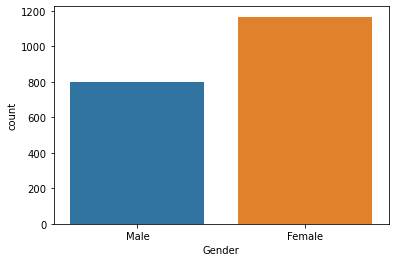

In [11]:
sns.countplot(x=df['Gender']);

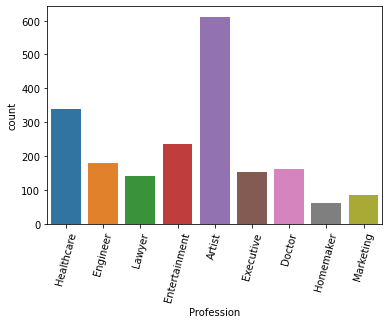

In [15]:
plt.xticks(rotation=75)
sns.countplot(x=df['Profession']);

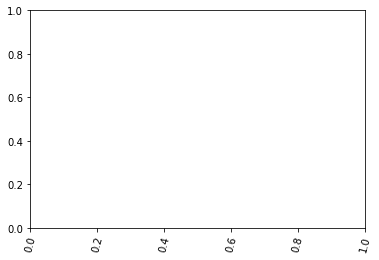

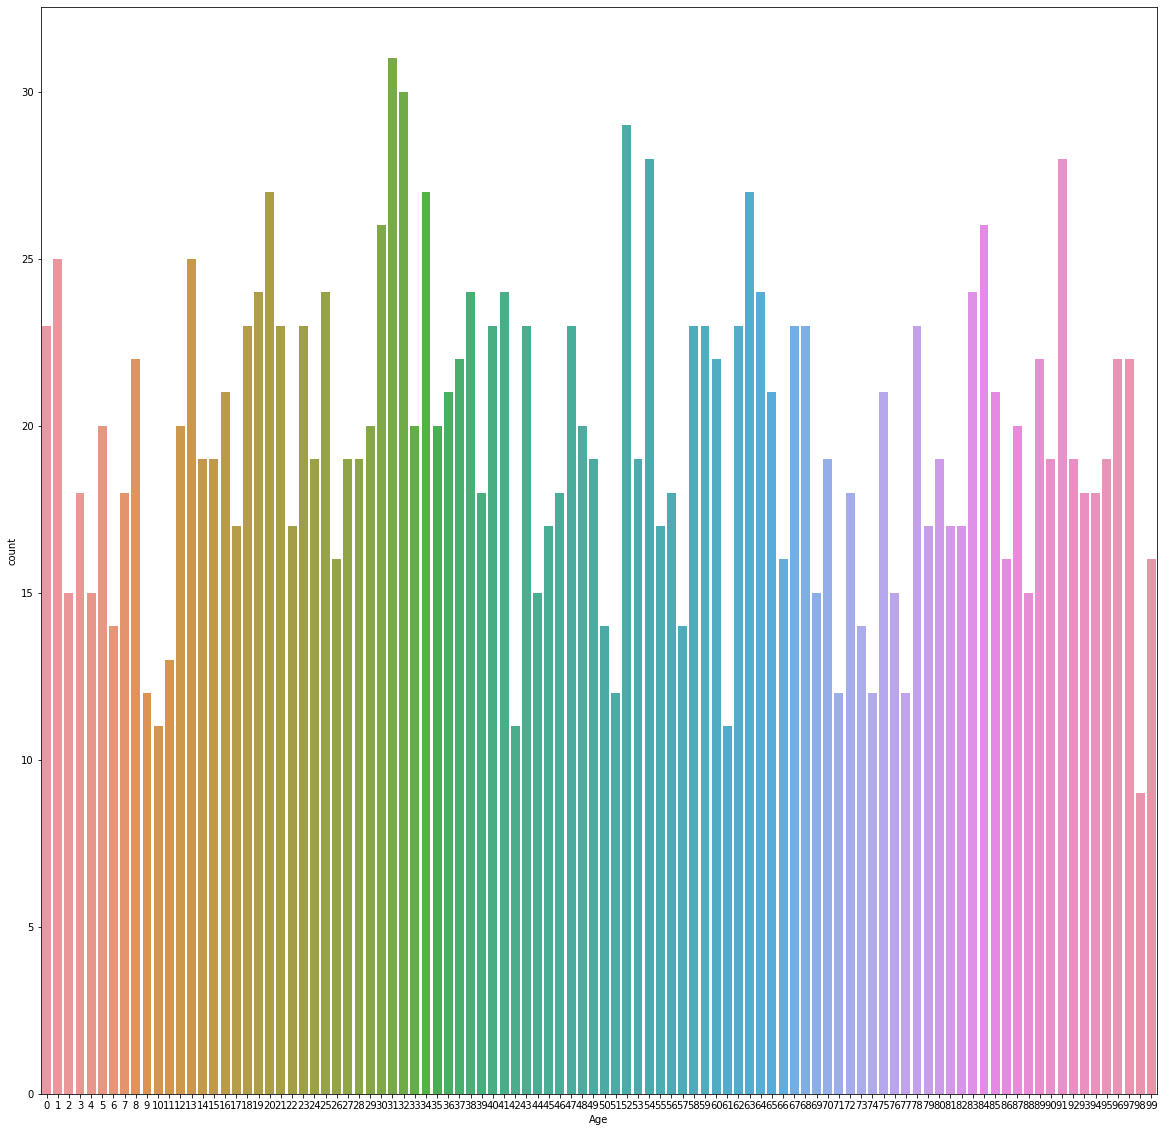

In [18]:
plt.xticks(rotation=75)
plt.figure(figsize=(20,20))
sns.countplot(x=df['Age']);

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [27]:
x=df[["Age","Annual Income ($)","Spending Score (1-100)","Work Experience"]]

In [51]:
model=KMeans(n_clusters=9)

In [52]:
model=model.fit(x)

In [53]:
tahmin=model.predict(x)

In [54]:
tahmin

array([4, 4, 3, ..., 3, 6, 1])

In [55]:
x["cluster"]=tahmin

In [56]:
silhouette_score(x,tahmin)

0.5536374576922982

In [57]:
allscore=[]
allclusters=[]
uzaklıklar=[]
def clust(kactane):
    
    for i in range(1,kactane+1):
        i=i+1
        model=KMeans(n_clusters=i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        uzaklık=model.inertia_
        print(" Cluster ",i," score ",score)
        allscore.append(score)
        allclusters.append(i)
        uzaklıklar.append(uzaklık)
clust(10)

 Cluster  2  score  0.618852917522043
 Cluster  3  score  0.5575372564195739
 Cluster  4  score  0.5334172583846314
 Cluster  5  score  0.561462793232877
 Cluster  6  score  0.5708948403700217
 Cluster  7  score  0.5460451030858986
 Cluster  8  score  0.5468625981308004
 Cluster  9  score  0.5517813606043513
 Cluster  10  score  0.5557907636077889
 Cluster  11  score  0.5550775588188871


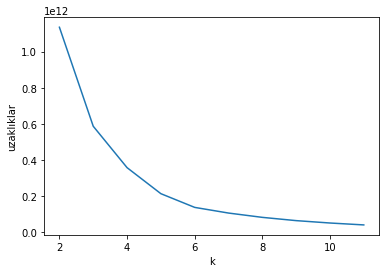

In [43]:
plt.xlabel("k")
plt.ylabel("uzaklıklar")
plt.plot(allclusters,uzaklıklar)